# Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or
                                                                                       he/she doesn't).

In [1]:
import pandas as pd 
from  matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


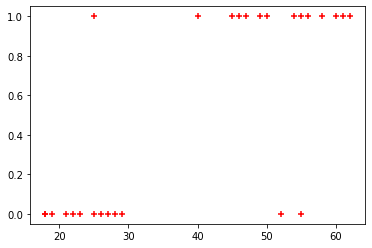

In [5]:
plt.scatter(df.age,df.bought_insurance,marker="+",color="red")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(df[["age"]],df.bought_insurance,train_size=.2,random_state=42)

In [46]:
x_train

,age
7,60
10,18
14,49
19,18
6,55


In [47]:
x_test

,age
8,62
13,29
9,61
21,26
0,22
11,28
16,25
17,58
12,27
24,50


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [50]:
model.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [54]:
print(y_test,y_predicted)

8     1
13    0
9     1
21    0
0     0
11    0
16    1
17    1
12    0
24    1
1     0
4     1
5     1
2     1
15    1
22    1
3     0
25    1
23    1
18    0
26    0
20    0
Name: bought_insurance, dtype: int64 [1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0]


In [55]:
model.predict_proba(x_test)   #(ni hone ki , hone ki probablity)

array([[0.18297796, 0.81702204],
       [0.90942354, 0.09057646],
       [0.20083874, 0.79916126],
       [0.93415484, 0.06584516],
       [0.95743787, 0.04256213],
       [0.91847886, 0.08152114],
       [0.94089835, 0.05910165],
       [0.26205   , 0.73795   ],
       [0.92670184, 0.07329816],
       [0.47167499, 0.52832501],
       [0.94089835, 0.05910165],
       [0.58602046, 0.41397954],
       [0.30898668, 0.69101332],
       [0.55781481, 0.44218519],
       [0.33411738, 0.66588262],
       [0.73865268, 0.26134732],
       [0.41486212, 0.58513788],
       [0.36022652, 0.63977348],
       [0.613673  , 0.386327  ],
       [0.96949887, 0.03050113],
       [0.95248623, 0.04751377],
       [0.96189412, 0.03810588]])

In [56]:
model.score(x_test,y_test)

0.7272727272727273

In [57]:
model.coef_

array([[0.11523991]])

In [59]:
model.intercept_

array([-5.64857389])

In [ ]:
Lets defined sigmoid function now and do the math with hand

In [60]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [61]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [62]:
age = 35
prediction_function(age)

0.4850044983805899

In [63]:
age = 43
prediction_function(age)

0.568565299077705

In [ ]:
import pandas 

In [ ]:
Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention 
(i.e. whether they leave the company or continue to work)

Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [5]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
left = (df["left"]==1).sum()
print(left)

3571


In [11]:
retain = (df["left"]==0).sum()
print(retain)

11428


In [12]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
# From above table we can draw following conclusions,

# **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs
#     the retained ones (0.66)
# **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
# **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm


In [ ]:
# now we have to make relationship between salary and  person left

In [14]:
pd.crosstab(df.salary,df.left)       #############

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [20]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:xlabel='salary'>

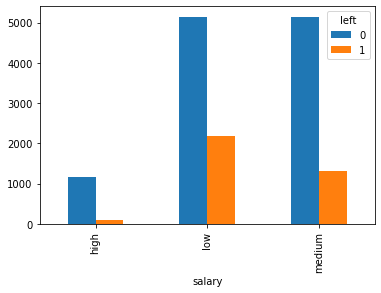

In [15]:
pd.crosstab(df.salary,df.left).plot(kind = "bar") 

In [ ]:
From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**

In [23]:
sub_df=df[["satisfaction_level","average_montly_hours","promotion_last_5years"]]
sub_df

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0
...,...,...,...
14994,0.40,151,0
14995,0.37,160,0
14996,0.37,143,0
14997,0.11,280,0


In [26]:
salary_dummy = pd.get_dummies(df.salary,prefix="salary")
salary_dummy 

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [30]:
df_new = pd.concat([sub_df,salary_dummy],axis=1)
df_new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [33]:
df_new.drop("salary_medium",axis="columns",inplace = True)

In [35]:
df_new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [56]:
target_variable = df[["left"]]
target_variable.head()
# target_variable.sum() i it will show how many left the company

,left
0,1
1,1
2,1
3,1
4,1


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(df_new,target_variable,train_size=.8,random_state=67)

In [59]:
x_train.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
11790,0.90,172,0,0,0
13859,0.17,174,0,0,0
12935,0.82,152,0,0,1
2707,0.83,165,0,0,1
9804,0.71,249,0,0,1


In [60]:
y_train.head()

,left
11790,0
13859,0
12935,0
2707,0
9804,0


In [61]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()

In [67]:
model.fit(x_train , y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [69]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [71]:
model.score(x_test,y_test)    # it  will find a d/f between y_test and y_predict

0.7816666666666666

In [75]:
y_test.head()

,left
651,1
13961,0
7652,0
4855,0
1251,1


In [76]:
a = model.predict_proba(x_test)   # ni hone ki and hone ki probability
a

array([[0.35927516, 0.64072484],
       [0.71686964, 0.28313036],
       [0.95085385, 0.04914615],
       ...,
       [0.91116964, 0.08883036],
       [0.35927516, 0.64072484],
       [0.90900565, 0.09099435]])